In [2]:
import os
os.chdir(r'/Users/zhanghui/商业分析工具和应用/Python/Python_book/6Inference')

#  查看分布情况

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
#查看住宅价格增长率
house_price_gr = pd.read_csv('house_price_gr.csv',encoding = 'gbk')
house_price_gr.head()

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528


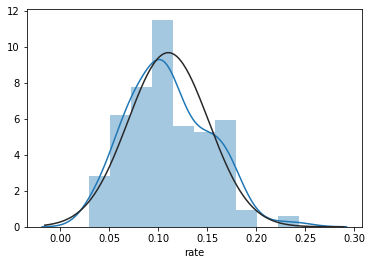

In [5]:
#考察变量是否符合正态分布
sns.distplot(house_price_gr.rate,kde = True,fit = stats.norm)

In [6]:
#使用QQ图来反映变量与正态分布的接近程度
import statsmodels.api as sm
from matplotlib import pyplot as plt

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


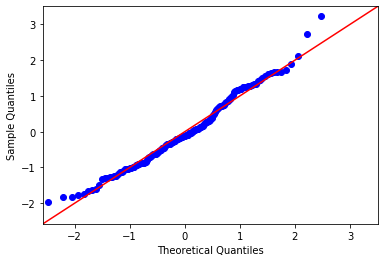

In [7]:
fig = sm.qqplot(house_price_gr.rate, fit = True, line = '45')
fig.show()

# 假设检验

1 单样本t检验
原假设：总体均值等于u
备择假设：总体均值不等于u

In [8]:
house_price_gr.rate.mean()

0.11006099670192315

In [9]:
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
print('t-statistic = %6.4f, p-value = %6.4f, df = %s' %d1.ttest_mean(0.1))

t-statistic = 2.9812, p-value = 0.0034, df = 149.0


分析：样本住房增长率为11%，原假设中总体均值为10%，经过单样本t检验，P值为0.0034。如果规定显著性水平为0.05，可以拒绝原假设，即改样本总体均值不等于10%。

2 双样本t检验
常用于检验某二分类变量区分下的某连续变量是否有显著差异。如信用卡消费是否受性别的影响。
检验流程：1）获取两组样本数据，计算平均值；2）进行方差齐性检验；3）若方差齐，进行方差齐性双样本t检验，方差不齐，进行方差不齐的双样本t检验。
原假设：无显著差异

In [10]:
creditcard_exp = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
creditcard_exp = creditcard_exp.dropna(how = 'any')
creditcard_exp.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2
5,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,1681,-0.302113,3


In [11]:
creditcard_exp['avg_exp'].groupby(creditcard_exp['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,50.0,925.7052,430.833365,163.18,593.3125,813.650,1204.7775,1992.39
1,20.0,1128.5310,462.281389,648.15,829.8600,1020.005,1238.2025,2430.03


男性信用卡消费平均值为925.7，女性为1128.5.使用双样本t检验看看这种差异是否显著

In [12]:
gender0 = creditcard_exp[creditcard_exp['gender'] ==0]['avg_exp']
gender1 = creditcard_exp[creditcard_exp['gender'] ==1]['avg_exp']
leveneTestRes = stats.levene(gender0,gender1,center = 'median')
print('w-value = %6.4f, p-value = %6.4f' % leveneTestRes)

w-value = 0.0683, p-value = 0.7946


p_value >0.05,方差相同。进行方差齐性检验

In [13]:
stats.stats.ttest_ind(gender0,gender1,equal_var = True)

Ttest_indResult(statistic=-1.742901386808629, pvalue=0.08587122878448449)

p_value >0.05,说明男女在信用卡消费上无显著差异

3 方差分析
多于两个分类的分类变量与连续变量的关系。例如信用卡消费是否受教育程度影响。
单因素方差分析
多因素方差分析
原假设：教育程度不会显著影响信用卡消费。

In [15]:
#单因素方差分析
edu = []
for i in range(4):
    edu.append(creditcard_exp[creditcard_exp['edu_class'] ==i]['avg_exp'])
stats.f_oneway(*edu)

F_onewayResult(statistic=31.825683356937645, pvalue=7.658361691248968e-13)

p-value <0.05,拒绝原假设，教育程度会显著影响信用卡的消费。

In [16]:
#多因素方差分析
#无交互效应
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ana = ols('avg_exp ~ C(edu_class) + C(gender)', data = creditcard_exp).fit()
sm.stats.anova_lm(ana)

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,31.578365,1.031496e-12
C(gender),1.0,4.178273e+04,4.178273e+04,0.487111,4.877082e-01
Residual,65.0,5.575481e+06,8.577662e+04,NaN,NaN


从p值可以看出，不同教育程度的平均支出存在显著差异，而对性别则没有显著差异

In [17]:
#有交互效应
ana = ols('avg_exp ~ C(edu_class) + C(gender)+C(edu_class)*C(gender)', data = creditcard_exp).fit()
sm.stats.anova_lm(ana)

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,33.839350,3.753889e-13
C(gender),1.0,4.178273e+04,4.178273e+04,0.521988,4.726685e-01
C(edu_class):C(gender),3.0,5.866038e+05,1.955346e+05,2.442795,7.232214e-02
Residual,63.0,5.042862e+06,8.004544e+04,NaN,NaN


从p值可以看出，教育程度与性别的交互项对平均支出的影响是显著的。

4 相关分析-两个连续变量的关系检验
相关系数：
pearson-线形关系
spearman-有序变量，不用假设变量服从正态分布
kendall-非线性
散点图矩阵

In [18]:
#相关系数
creditcard_exp[['Income','avg_exp']].corr(method = 'pearson')

,Income,avg_exp
Income,1.000000,0.674011
avg_exp,0.674011,1.000000


In [19]:
creditcard_exp[['Income','avg_exp']].corr(method = 'spearman')

,Income,avg_exp
Income,1.000000,0.707917
avg_exp,0.707917,1.000000


In [20]:
creditcard_exp[['Income','avg_exp']].corr(method = 'kendall')

,Income,avg_exp
Income,1.000000,0.525466
avg_exp,0.525466,1.000000


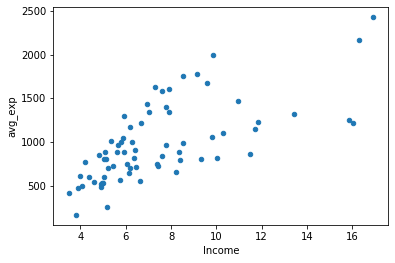

In [21]:
creditcard_exp.plot(x = 'Income', y = 'avg_exp', kind = 'scatter')

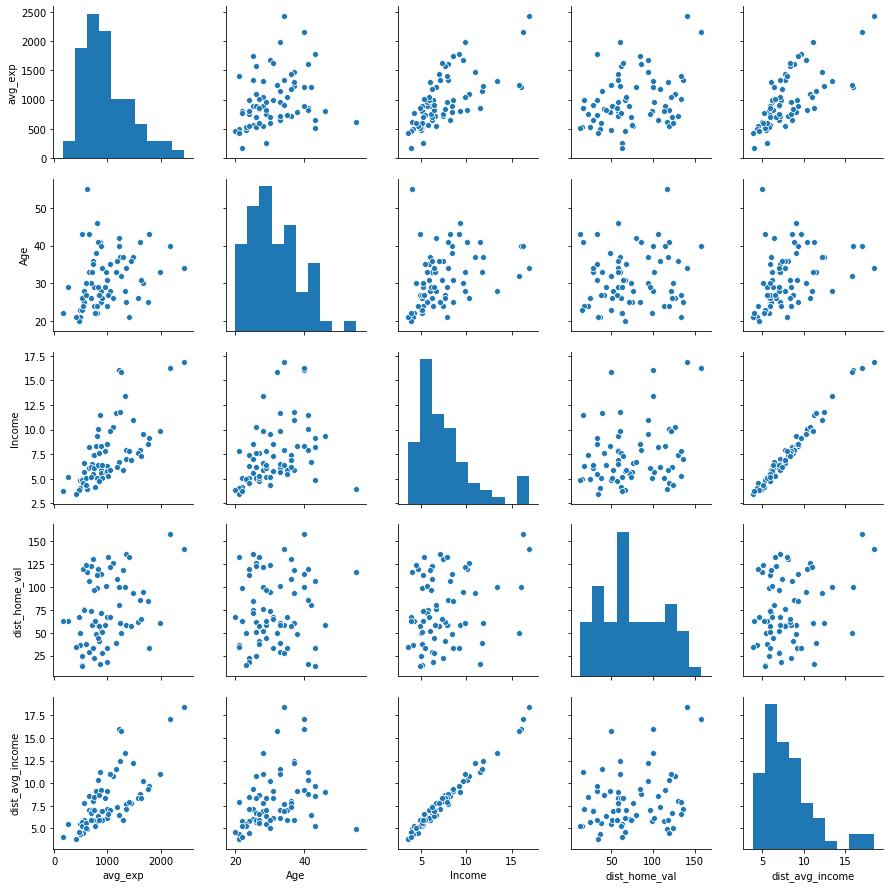

In [22]:
sns.pairplot(creditcard_exp[['avg_exp','Age','Income','dist_home_val','dist_avg_income']])
plt.show()

5 卡方检验-两分类变量的关系检验
原假设：两分类变量没有关系


In [24]:
#列联表
accepts = pd.read_csv('accepts.csv')
corss_table = pd.crosstab(accepts.bankruptcy_ind,columns = accepts.bad_ind,margins = True)
corss_table

bad_ind,0,1,All
bankruptcy_ind,,,
N,4163,1017,5180
Y,345,103,448
All,4508,1120,5628


In [25]:
corss_table_rowpct = corss_table.div(corss_table['All'],axis = 0)
corss_table_rowpct

bad_ind,0,1,All
bankruptcy_ind,,,
N,0.803668,0.196332,1.0
Y,0.770089,0.229911,1.0
All,0.800995,0.199005,1.0


破产状态的违约率和没有破产的相差不大，说明破产与是否违约不相关。

In [27]:
#卡方检验
print('chisq = %6.4f\n p_value = %6.4f\n dof = %i\n expected_freq = %s'
     %stats.chi2_contingency(corss_table))

chisq = 2.9167
 p_value = 0.5719
 dof = 4
 expected_freq = [[4149.15422886 1030.84577114 5180.        ]
 [ 358.84577114   89.15422886  448.        ]
 [4508.         1120.         5628.        ]]


p值大于0.5，接受原假设，即破产与是否违约没有关系。